downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/sm/scikit_learn_data
Naive Bayes Classifier Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       0.33      1.00      0.50         1
           3       0.00      0.00      0.00         3
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3
           8       1.00      0.67      0.80         3
           9       0.50      1.00      0.67         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.50      0.67      0.57         3
          13       1.00      0.50      0.67         2
          14       0.00      0.00      0.00         4
          15     

/usr/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: 

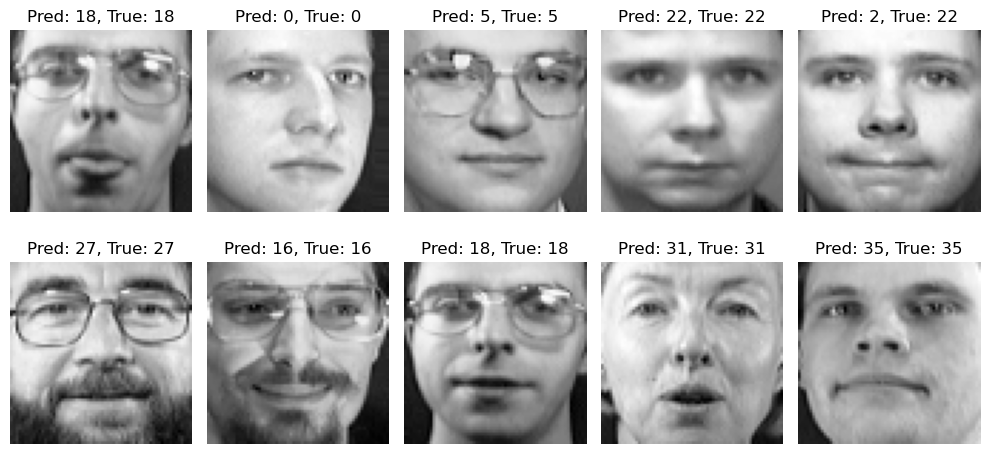


Classifying New Sample (Test Sample 0):
Predicted Class: 18, True Class: 18


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def load_data():
    data = fetch_olivetti_faces(shuffle=True, random_state=42)
    X = data.data
    y = data.target
    return X, y

def train_naive_bayes(X_train, y_train):
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train, y_train)
    return nb_classifier

def classify_new_sample(model, sample):
    prediction = model.predict([sample])
    return prediction[0]

def main():
    
    X, y = load_data()

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    nb_model = train_naive_bayes(X_train, y_train)

    
    y_pred = nb_model.predict(X_test)

    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Naive Bayes Classifier Accuracy: {accuracy:.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

    
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X_test[i].reshape(64, 64), cmap='gray')
        ax.set_title(f"Pred: {y_pred[i]}, True: {y_test[i]}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    
    new_sample = X_test[0]
    predicted_class = classify_new_sample(nb_model, new_sample)
    print(f"\nClassifying New Sample (Test Sample 0):")
    print(f"Predicted Class: {predicted_class}, True Class: {y_test[0]}")

if __name__ == "__main__":
    main()
